In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
# Feature Selection
from sklearn.feature_selection import RFE

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



**Why did you choose this dataset & which UNSDG does it support?**

This dataset aligns with United Nations Sustainable Development Goal 11: Sustainable Cities and Communities. Accurate traffic volume prediction supports urban planning, traffic management, and congestion reduction, contributing to safer and more sustainable cities.

**Load Dataset**

In [2]:
df_reg = pd.read_csv("/content/drive/MyDrive/Metro_Interstate_Traffic_Volume (1).csv")
df_reg.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


**When and by whom the dataset was created**

The Metro Interstate Traffic Volume dataset was created by transportation and data science contributors for traffic analysis and forecasting research. It was compiled using traffic sensors and weather data, and later made publicly available for academic use.

**How and from where the dataset was accessed**

The dataset was accessed from a publicly available open data repository. It was downloaded in CSV format and imported into Python using the pandas library for preprocessing and regression analysis.

**List and brief description of all attributes (features)**

temp: Temperature in Kelvin

rain_1h: Rainfall in the last hour

snow_1h: Snowfall in the last hour

clouds_all: Cloud coverage percentage

weather_main: Main weather category

weather_description: Detailed weather condition

date_time: Timestamp of the observation

traffic_volume: Target variable representing number of vehicles

**Data Cleaning & Encoding**

In [3]:
df_reg.info()
df_reg.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [4]:
le = LabelEncoder()
df_reg.dropna(inplace=True)

for col in df_reg.select_dtypes(include="object").columns:
    df_reg[col] = le.fit_transform(df_reg[col])

**How does traffic volume vary with time of day and day of the week?**

This helps identify peak congestion periods.

**What impact do weather conditions have on traffic volume?**

This examines how rain, snow, or cloud coverage affect traffic flow.

**EDA**

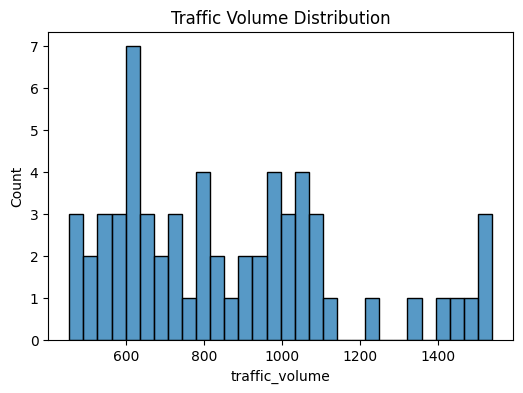

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df_reg["traffic_volume"], bins=30)
plt.title("Traffic Volume Distribution")
plt.show()

**Train-Test Split & Scaling**

In [6]:
scaler = StandardScaler()
X = df_reg.drop("traffic_volume", axis=1)
y = df_reg["traffic_volume"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Neural Network Regressor**

In [7]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=1000,
    early_stopping=True,
    random_state=42
)

mlp_reg.fit(X_train, y_train)
y_pred_nn = mlp_reg.predict(X_test)

**Classical Regression Models**

Linear Regression

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [9]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

lr_r2 = r2_score(y_test, y_pred_lr)

print(lr_rmse, lr_r2)

292.53003428082445 -0.34694246171252496


Random Forest

In [10]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [11]:
mlp_mse = mean_squared_error(y_test, y_pred_nn)
mlp_rmse = np.sqrt(mlp_mse)

mlp_r2 = r2_score(y_test, y_pred_nn)

print(mlp_rmse, mlp_r2)

245.8132926779927 0.04891605961332124


**Regression Evaluation Function**

In [12]:
def eval_reg(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

print("Linear Regression:", eval_reg(y_test, y_pred_lr))
print("Random Forest:", eval_reg(y_test, y_pred_rf))

Linear Regression: {'MAE': 263.80298082065843, 'RMSE': np.float64(292.53003428082445), 'R2': -0.34694246171252496}
Random Forest: {'MAE': 194.11846153846156, 'RMSE': np.float64(264.83818542940224), 'R2': -0.10400064506562967}


**Feature Selection (RFE)**

In [13]:
selector = RFE(
    estimator=LinearRegression(),
    n_features_to_select=8
)

X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

print(X_train.shape, "→", X_train_rfe.shape)

(48, 8) → (48, 8)


**Hyperparameter Tuning (Random Forest)**

In [14]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid_reg = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    scoring="r2",
    cv=5
)

grid_reg.fit(X_train_rfe, y_train)

print("Best parameters:", grid_reg.best_params_)
print("Best CV R2:", grid_reg.best_score_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R2: -0.016923515265664622


In [15]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(
    lr,
    X_train,
    y_train,
    cv=5,
    scoring='r2'
).mean()

print("Linear Regression CV R² Score:", lr_cv)


Linear Regression CV R² Score: -1.0694437757233646


**Final Regression Comparison**

In [16]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "MLP Regressor"],
    "Features Used": [X_train.shape[1], X_train.shape[1]],
    "CV Score": [lr_cv, mlp_r2],
    "RMSE": [lr_rmse, mlp_rmse],
    "R² Score": [lr_r2, mlp_r2]
})

comparison

,Model,Features Used,CV Score,RMSE,R² Score
0,Linear Regression,8,-1.069444,292.530034,-0.346942
1,MLP Regressor,8,0.048916,245.813293,0.048916
